In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [285]:
df=pd.read_csv('preprocessed_2017.csv')

In [286]:
df.head()

,zip_code,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion
0,10001,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837
1,10002,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107
2,10003,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384
3,10004,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374
4,10005,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124


In [287]:
#dropping zipcodes
df_zipcodes= df[['zip_code']]
df_zipcodes.head()

,zip_code
0,10001
1,10002
2,10003
3,10004
4,10005


In [288]:
df.drop('zip_code',axis=1,inplace=True)

In [289]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler

In [290]:
df.head()

,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion
0,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837
1,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107
2,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384
3,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374
4,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124


In [291]:
X= StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[ 2.66243246e+00,  5.49164141e-01,  3.82799645e+00, ...,
        -1.18034769e-01,  2.45629995e-01,  1.83737430e-01],
       [ 6.49248310e+00,  2.02716565e+00, -6.05299569e-02, ...,
         7.32701740e-01,  4.07936706e-03,  4.83118770e-01],
       [ 7.01733627e+00, -2.59545422e-01,  4.18827032e+00, ...,
        -4.05521434e-02,  4.74868735e-01,  1.22804612e-01],
       ...,
       [-2.59213244e-01, -4.04324465e-01,  1.06571906e-01, ...,
        -3.27698479e-01, -4.91856798e-01,  3.05280548e-01],
       [-2.61668241e-01, -3.31242532e-01, -1.51599770e-01, ...,
        -3.27698479e-01, -1.52063654e-01,  6.42336917e-02],
       [-2.58020866e-01,  2.85639301e-02, -5.12154715e-01, ...,
        -3.27698479e-01,  6.23479149e-01, -9.78475813e-01]])

### Kmeans clustering

In [292]:
from sklearn.cluster import KMeans

In [293]:
wss =[] 

In [294]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

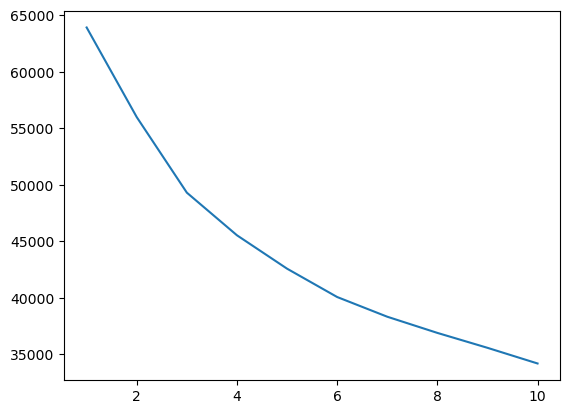

In [295]:
plt.plot(range(1,11), wss)

In [296]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels = k_means.labels_

In [297]:
df["Clus_kmeans"] = labels
df.head(5)

,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans
0,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,1
2,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,0
4,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


In [298]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [299]:
silhouette_score(df,labels)

0.6302978751931243

In [300]:
pd.set_option('display.max_columns', None)


kmeans_data=df.groupby('Clus_kmeans').mean()
kmeans_data['Freq']=df.Clus_kmeans.value_counts().sort_index()
kmeans_data

,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Freq
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,
0,964.101790,0.096660,31650.228772,0.406509,0.022807,964.101790,0.919239,0.097938,0.642042,0.260020,0.221183,0.049430,0.940676,0.649633,0.148544,0.099048,0.100602,0.002174,0.932698,0.387142,2850
1,26578.394636,0.229635,30614.524638,0.480718,0.495652,26578.394636,0.503773,0.190976,0.516191,0.292833,0.264961,0.062601,0.902979,0.672244,0.124464,0.082566,0.119466,0.001260,0.895650,0.518278,345


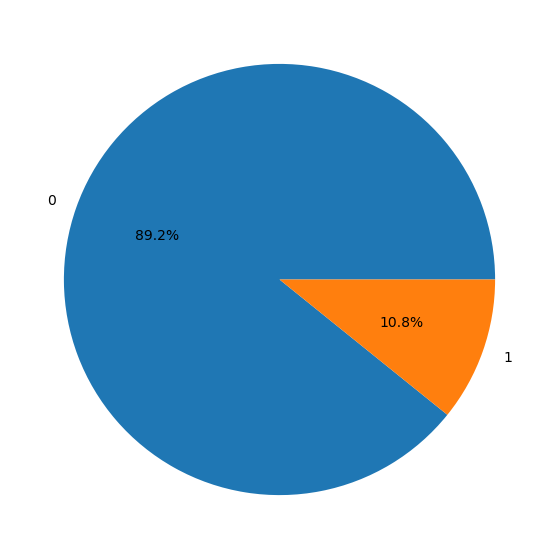

In [301]:
plt.figure(figsize= (7,7))
plt.pie(df['Clus_kmeans'].value_counts(), labels = df['Clus_kmeans'].value_counts().index,autopct= '%1.1f%%')
plt.show()

In [302]:
df.head()

,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans
0,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,1
2,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,0
4,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


In [303]:
df = pd.concat([df_zipcodes, df], axis=1)


In [304]:
df.shape

(3195, 22)

In [310]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from ipywidgets import interact, Dropdown

## Cluster Visualisation

In [311]:
# Create dropdown widgets for x and y axis variables
x_var_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='X Axis')
y_var_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='Y Axis')

# Define function to create the scatter plot
def scatterplot(x_var, y_var):
    fig = px.scatter(df, x=x_var, y=y_var, color='Clus_kmeans', hover_data=['zip_code'])
    fig.show()
    
# Create interactive plot using the scatterplot function and the dropdown widgets
interactive_plot = interact(scatterplot, x_var=x_var_dropdown, y_var=y_var_dropdown)

# Display the interactive plot
interactive_plot


interactive(children=(Dropdown(description='X Axis', options=('incomeBelowPovertyLevelProportion', 'incomePerC…

<function __main__.scatterplot(x_var, y_var)>

## Poverty visualisation

In [312]:
# Create dropdown widgets for x and y axis variables
x_var_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='X Axis')
y_var_dropdown = widgets.Dropdown(options=list(df.columns[2:]), description='Y Axis')

# Define function to create the scatter plot
def scatterplot(x_var, y_var):
    fig = px.scatter(df, x=x_var, y=y_var, color='underPoverty', hover_data=['zip_code'])
    fig.show()
    
# Create interactive plot using the scatterplot function and the dropdown widgets
interactive_plot = interact(scatterplot, x_var=x_var_dropdown, y_var=y_var_dropdown)

# Display the interactive plot
interactive_plot


interactive(children=(Dropdown(description='X Axis', options=('incomeBelowPovertyLevelProportion', 'incomePerC…

<function __main__.scatterplot(x_var, y_var)>

## Kmeans visulaisation using PCA

In [261]:
df.head()

,zip_code,zip_code,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans
0,10001,10001,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,10002,10002,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,1
2,10003,10003,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,10004,10004,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,0
4,10005,10005,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


In [262]:
# df_pca_plt=df.copy()

In [263]:
# df_pca_plt.head()

,zip_code,zip_code,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans
0,10001,10001,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,10002,10002,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,1
2,10003,10003,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,10004,10004,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,0
4,10005,10005,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


In [264]:
# df_pca_plt.drop('zip_code',axis=1,inplace=True)

In [265]:
# df_pca_plt.head()

,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion,Clus_kmeans
0,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837,1
1,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107,1
2,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384,1
3,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374,0
4,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124,1


In [266]:
# df_pca_plt.drop('Clus_kmeans',axis=1,inplace=True)

In [267]:
# df_pca_plt.head()

,Population Density (Per Sq. Mile),incomeBelowPovertyLevelProportion,incomePerCapita,incomeGiniIndex,underPoverty,popDensity,whiteMajority,eduHsOrLessProportion,eduHsProportion,eduBachOrBetterProportion,eduEnrollmentProportion,eduDropoutProportion,employedProportion,employedPvtSecProportion,employedPubSecProportion,employedSelfEmpProportion,employedPvtNonProProportion,employedUnpaidFamProportion,insuredProportion,housingRentMoreThan30pcProportion
0,38537.590,0.152420,86014.0,0.6074,0,38537.590,0.623168,0.061326,0.236168,0.702506,0.220734,0.013311,0.938119,0.698973,0.060862,0.134652,0.104186,0.001328,0.942582,0.435837
1,88610.210,0.263844,30677.0,0.5725,1,88610.210,0.314431,0.332338,0.336358,0.331304,0.179846,0.042967,0.917144,0.705079,0.094036,0.111864,0.082307,0.006715,0.928928,0.492107
2,95471.940,0.091452,91141.0,0.5680,0,95471.940,0.779159,0.035003,0.161239,0.803757,0.272403,0.004515,0.951225,0.707649,0.061125,0.130766,0.098642,0.001818,0.955539,0.424384
3,5341.677,0.025443,105390.0,0.4436,0,5341.677,0.688963,0.014114,0.080946,0.904940,0.147580,0.000000,0.963320,0.731556,0.058544,0.126606,0.083294,0.000000,0.934783,0.368374
4,118063.100,0.117209,102957.0,0.4588,0,118063.100,0.748157,0.007028,0.108231,0.884742,0.187189,0.000000,0.973356,0.831641,0.032671,0.069757,0.065931,0.000000,0.956777,0.370124


In [268]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

In [269]:
# pca = PCA(n_components=9)
# scaler = StandardScaler()

In [270]:
# X = scaler.fit_transform(df_pca_plt) #scaling the features
# X = pca.fit_transform(df_pca_plt)

In [271]:
# k = 3  # Chosen number of clusters from elbow and silhouette plots
#         #should be repetaed for k=4
# kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=400)
# kmeans.fit(X)

# pred_labels = kmeans.predict(X)

# #X['labels'] = pred_labels
# df_pca_plt['labels'] = pred_labels

In [272]:
# above_poverty_indices = np.where(df_pca_plt['underPoverty'] == 0)[0]
# under_poverty_indices = np.where(df_pca_plt['underPoverty'] == 1)[0]

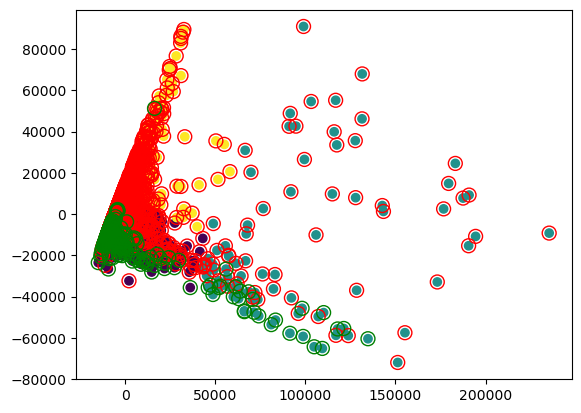

In [273]:
# plt.scatter(X[:, 0], X[:, 1], c=pred_labels)
# plt.scatter(X[above_poverty_indices, 0], X[above_poverty_indices, 1], s=100, marker='o', facecolors='none', edgecolors='r')
# plt.scatter(X[under_poverty_indices, 0], X[under_poverty_indices, 1], s=100, marker='o', facecolors='none', edgecolors='g')

Although there are no internationally defined standard cut-off values, it’s commonly recognized that Gini index<0.2 corresponds with perfect income equality, 0.2–0.3 corresponds with relative equality, 0.3–0.4 corresponds with a relatively reasonable income gap, 0.4–0.5 corresponds with high income disparity, above 0.5 corresponds with severe income disparity.